# Curso de introducción a la programación con Python

**Autor: Luis Fernando Apáez Álvarez**

## Clase 10: Herencia múltiple (Parte IV)

* [MRO en python](#parte1)    

Mientras nuestro código vaya aumentando de complejidad, puede ocurrir que la herencia (herencia múltiple) tenga muchas líneas jerárquicas. De tal manera, cuando tengamos una instancia de una clase se nos puede presentar el caso en que no sepamos a qué otras clases pertenece. Para ello utilizaremos ``isinstance(<instancia>, <clase>)`` para averiguar si dicha instancia pertenece a otra clase especifica. Por ejemplo, consideremos el código de la sesión anterior

In [1]:
# Superclase 1

class Figura():
    
    # Constructor
    def __init__(self, ancho, altura):
        self.ancho = ancho
        self.altura = altura
# -------------------------------------------------------------------------        
# Superclase 2 

class Color():
    
    # Constructor
    def __init__(self, color):
        self.color = color

# -------------------------------------------------------------------------

# Subclase Cuadrado de las superclases Figura y Color

class Cuadrado(Figura, Color):
    
    # Constructor
    def __init__(self, lado, color):
        
        # Sobreescritura del método __init__ correspondiente a la clase Figura
        Figura.__init__(self, lado, lado)
        
        # Sobreescritura del método __init__ correspondiente a la clase Color
        Color.__init__(self, color)
        
    # Método para calcular el área
    def area(self):
        return self.ancho * self.altura

creamos una instancia de la clase _Cuadrado_

In [2]:
cuadrado1 = Cuadrado(2, 'Azul')

# vemos si cuadrado1 pertenece a la clase Figura
print(isinstance(cuadrado1, Figura))

print('-' * 30)

# vemos si cuadrado1 pertenece a la clase Color
print(isinstance(cuadrado1, Color))

True
------------------------------
True


## MRO en Python <a id="parte1"></a>

El _método de resolución de orden_ (o _Method Resolution Orden_) es un algoritmo que se utiliza para determinar el orden de búsqueda de métodos en herencia múltiple, donde <span style="color:rgb(10,10,150)">Python</span> calcula la lista MRO para cada clase. Básicamente este método nos permite conocer la jerarquía de clases de la clase en la cual lo invocamos.

La lista MRO contiene todas las superclases de un clase, cuyo orden radica en la relación jerárquica entre ellas. Así, cuando necesitemos encontrar un atributo en la cadena de herencia, <span style="color:rgb(10,10,150)">Python</span> buscará de izquierda a derecha en la lista MRO hasta que encuentre la primera clase que coincida con dicho atributo. Para esto último tenemos dos consideraciones
* La subclase en cuestión se comprobará antes que cualquier superclase.
* Se comprobarán varias superclases según su orden de lista.

Por ejemplo, consideremos el siguiente código

In [5]:
# Creamos una superclase

class Sup_clase:
    pass

# Creamos la subclase 1        
class A(Sup_clase):
    pass

# Creamos la subclase 2    
class B(Sup_clase):
    pass

# Creamos la subclase 3: subclase de las clases A y B  
class C(A,B):
    pass

con lo anterior conseguimos tener tres líneas jerárquicas. 

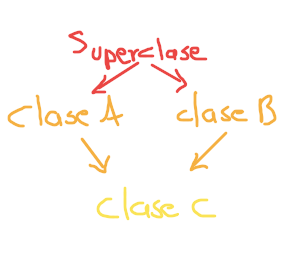

Luego, podemos ver la lista MRO de la clase _C_ invocando el método ``mro()``

In [8]:
C.mro()

[__main__.C, __main__.A, __main__.B, __main__.Sup_clase, object]

lo cual muestra primero la clase que invoca el método, después las primeras superclases de la subclase y al final la superclase en la primera línea de jerarquía, así como se muestra en la imagen anterior. 

Notemos que la lista MRO aparece primero la clase _A_ antes que la _B_ a pesar que tienen el mismo peso jerárquico. El orden que se les ha dado viene del orden en que fueron puestos (de izquierda a derecha) a la hora de declar la clase _C_ ``class C(A,B)``. Por ende, podemos cambiar el orden de la clase _A_ y _B_ en la lista MRO cambiando el orden a la hora de declar la clase _C_, por ejemplo

In [10]:
# Creamos una superclase

class Sup_clase:
    pass

# Creamos la subclase 1        
class A(Sup_clase):
    pass

# Creamos la subclase 2    
class B(Sup_clase):
    pass

# Cambiamos C(B,A) en lugar de C(A,B)
# Creamos la subclase 3: subclase de las clases A y B  
class C(B,A):
    pass

In [11]:
# Veamos ahora como ha cambiado el orden en la lista MRO
C.mro()

[__main__.C, __main__.B, __main__.A, __main__.Sup_clase, object]

* hablar de la clase object
* regresar al codigo figura y aplicar el mro

Debemos mencionar que en ambas listas MRO al final aparece un elemento denominado ``object``, la cual es la **clase principal** en <span style="color:rgb(10,10,150)">Python</span>, o superclase de todas las clases.

Por otro lado, recordemos que el objeto ``cuadrado1`` pertenece a la clase ``Cuadrado``, la cual a su vez es subclase de las superclases ``Figura`` y ``Color``, de donde la lista MRO es de la forma ``[__main__.Cuadrado, __main__.Figura, __main__.Color, object]`` de acuerdo a como definimos la herencia múltiple en este caso (recuerda que la clase que invoque el método ``mro()`` será la que ocupe el primer lugar de la lista MRO). En efecto

In [3]:
Cuadrado.mro()

[__main__.Cuadrado, __main__.Figura, __main__.Color, object]